In [2]:
# https://blog.naver.com/chromatic_365/222657670527
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pymysql
import matplotlib as mpl

# mysql db 연동
db = pymysql.connect(host='127.0.0.1',password='gkftndlTek!!',user='root',db='tp',charset='utf8', 
    cursorclass=pymysql.cursors.DictCursor)

cursor = db.cursor()

query = "select FM,PU1,PU2,TE1,TE2,TE3,P1,P2,P3,P4 from wholeData where DATETIME between '2014-05-01 00:00:00' and '2014-08-31 23:00:00'"
cursor.execute(query)
db_export = cursor.fetchall()

tp=pd.DataFrame(db_export)
#db_result_df = db_result_df.drop([db_result_df.columns[0]], axis=1) # 중복 index열 삭제

# scaling
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

scale_columns = ['FM', 'PU1', 'PU2', 'TE1', 'TE2', 'TE3', 'P1', 'P2', 'P3','P4']
tp_df = standard_scaling(tp, scale_columns)

tp_df_corr=tp_df.corr()
print(tp_df_corr)

#https://blog.naver.com/moongda0404/222729519749
# 대학본부의 2014, 2015 데이터로 2016 FM 예측

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

#학습 데이터와 테스트 데이터로 분리
#'TE1'을 제외한 모든 칼럼들은 X
X=tp[tp.columns.difference(['TE1'])]

y=tp['TE1']

#검증(test)는 20%로 한다. =test_siz=0.2
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=19)

#회귀 분석 객체 생성(선형 회귀 모델 생성)
lr=linear_model.LinearRegression()

#fit()는 기울기와 절편을 전달하기 위함
model=lr.fit(X_train, y_train)

print("\n")
#학습된 계수를 출력
print("학습된 계수:",lr.coef_)

print("\n")
#상수항을 출력
print("상수항:",lr.intercept_)

#새로운 값 예측
x_new=X_test
y_new=model.predict(x_new)

print(type(y_test))

y_compare={'y_test':y_test,'y_predicted':y_new}
pd.DataFrame(y_compare)

           FM       PU1       PU2       TE1       TE2       TE3        P1  \
FM   1.000000  0.784842  0.775647 -0.017993 -0.234224 -0.115696  0.051473   
PU1  0.784842  1.000000  0.784040 -0.053006 -0.262387 -0.163030  0.043091   
PU2  0.775647  0.784040  1.000000 -0.049877 -0.250450 -0.147642  0.054872   
TE1 -0.017993 -0.053006 -0.049877  1.000000  0.957766  0.972997  0.692657   
TE2 -0.234224 -0.262387 -0.250450  0.957766  1.000000  0.980650  0.611694   
TE3 -0.115696 -0.163030 -0.147642  0.972997  0.980650  1.000000  0.625911   
P1   0.051473  0.043091  0.054872  0.692657  0.611694  0.625911  1.000000   
P2   0.006835  0.004832  0.010143  0.622221  0.545581  0.522775  0.868503   
P3   0.010081  0.010250  0.015501  0.613073  0.535241  0.512730  0.868533   
P4   0.267734  0.320480  0.314827  0.560833  0.417417  0.427530  0.831033   

           P2        P3        P4  
FM   0.006835  0.010081  0.267734  
PU1  0.004832  0.010250  0.320480  
PU2  0.010143  0.015501  0.314827  
TE1  0.6

,y_test,y_predicted
1584,0.582522,0.657333
2625,-0.266248,-0.288813
719,0.663357,0.643522
1381,-0.448127,-0.201739
632,0.461269,0.460060
...,...,...
1711,0.218763,0.238518
2069,-3.398610,-3.299144
2885,0.643148,0.631142
500,0.420851,0.398194


In [2]:
# https://blog.naver.com/chromatic_365/222657670527
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pymysql
import matplotlib as mpl

# mysql db 연동
db = pymysql.connect(host='127.0.0.1',password='gkftndlTek!!',user='root',db='tp',charset='utf8', 
    cursorclass=pymysql.cursors.DictCursor)

cursor = db.cursor()

query = "select FM,PU1,PU2,TE1,TE2,TE3,P1,P2,P3,P4 from wholeData where DATETIME between '2014-05-01 00:00:00' and '2014-08-31 23:00:00'"
cursor.execute(query)
db_export = cursor.fetchall()

tp=pd.DataFrame(db_export)
#db_result_df = db_result_df.drop([db_result_df.columns[0]], axis=1) # 중복 index열 삭제

# scaling
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

scale_columns = ['FM', 'PU1', 'PU2', 'TE1', 'TE2', 'TE3', 'P1', 'P2', 'P3','P4']
tp_df = standard_scaling(tp, scale_columns)

tp_df_corr=tp_df.corr()
tp_df_corr

#https://blog.naver.com/moongda0404/222729519749
# 대학본부의 2014, 2015 데이터로 2016 FM 예측

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

#학습 데이터와 테스트 데이터로 분리
#'TE1'을 제외한 모든 칼럼들은 X
X=tp[tp.columns.difference(['TE1'])]

y=tp['TE1']

#검증(test)는 20%로 한다. =test_siz=0.2
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=19)

#회귀 분석 객체 생성(선형 회귀 모델 생성)
lr=linear_model.LinearRegression()

#fit()는 기울기와 절편을 전달하기 위함
model=lr.fit(X_train, y_train)

print("\n")
#학습된 계수를 출력
print("학습된 계수:",lr.coef_)

print("\n")
#상수항을 출력
print("상수항:",lr.intercept_)

#새로운 값 예측
x_new=X_test
y_new=model.predict(x_new)

print(type(y_test))

y_compare={'y_test':y_test,'y_predicted':y_new}
pd.DataFrame(y_compare)

print("\n")
#https://blog.naver.com/moongda0404/222729524245

# train R2 score를 출력
print(model.score(X_train, y_train))

# test R2 score를 출력
print(model.score(X_test, y_test))



학습된 계수: [ 0.07570858 -0.00531416  0.09818284 -0.3535859   0.40239185 -0.00637809
 -0.0443731   0.41638621  0.52594431]


상수항: 0.0021317338815415605
<class 'pandas.core.series.Series'>


0.9773701671422588
0.9854200286581989


<AxesSubplot:>

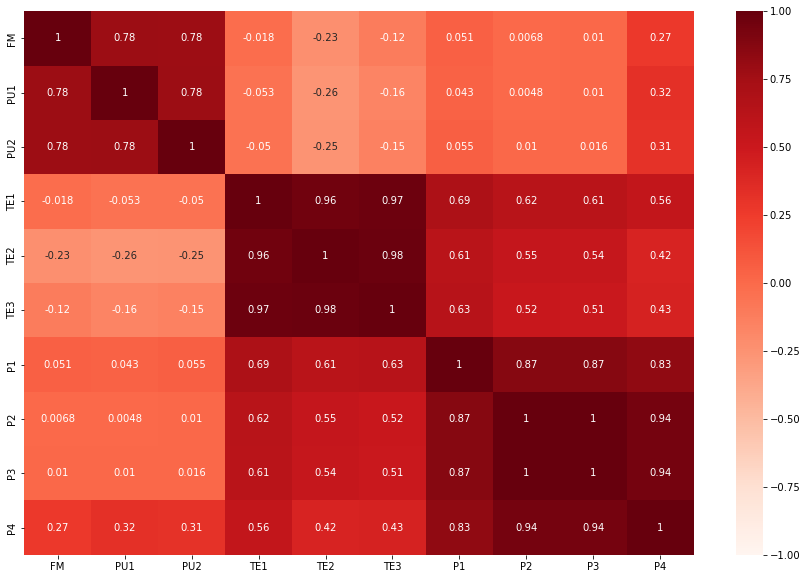

In [3]:
import seaborn as sb
tp_corr=tp[['FM', 'PU1', 'PU2', 'TE1', 'TE2', 'TE3', 'P1', 'P2', 'P3','P4']]
plt.rcParams['figure.figsize']=(15,10)

sb.heatmap(tp_corr.corr(),
          annot=True,
          cmap='Reds',
          vmin=-1,vmax=1
          )

      FM  PU1  PU2   TE1   TE2   TE3   P1   P2   P3
0      4    0    0  19.6  19.8  19.2  3.6  3.7  3.6
1      4    0    0  19.6  19.8  19.2  3.6  3.7  3.6
2      4    0    0  19.6  19.8  19.2  3.6  3.6  3.6
3      4    0    0  19.6  19.8  19.2  3.6  3.6  3.6
4      4    0    0  19.6  19.8  19.2  3.6  3.6  3.6
...   ..  ...  ...   ...   ...   ...  ...  ...  ...
2944   4    0    0  16.6  13.3  13.8  4.4  4.4  4.3
2945   4    0    0  16.8  14.0  14.2  4.8  4.8  4.8
2946   4    0    0  17.1  14.7  14.5  5.3  5.3  5.2
2947   4    0    0  17.4  15.3  14.9  5.7  5.7  5.7
2948   4    0    0  17.7  15.9  15.2  6.2  6.2  6.1

[2949 rows x 9 columns]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- TE1
Feature names seen at fit time, yet now missing:
- P4

  warnings.warn(message, FutureWarning)


<AxesSubplot:>

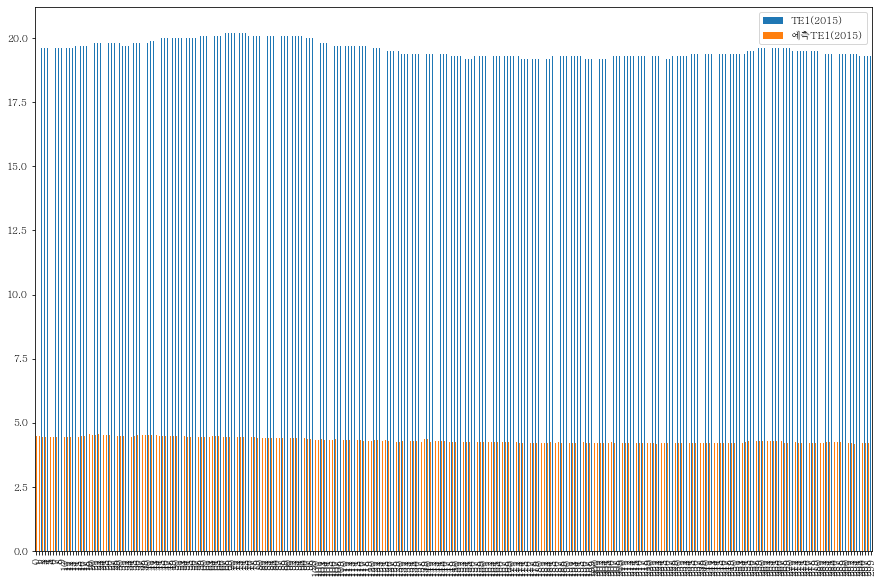

In [10]:
# mysql db 연동
db = pymysql.connect(host='127.0.0.1',password='gkftndlTek!!',user='root',db='tp',charset='utf8', 
    cursorclass=pymysql.cursors.DictCursor)

cursor = db.cursor()

query_2015 = "select FM,PU1,PU2,TE1,TE2,TE3,P1,P2,P3 from wholeData where DATETIME between '2015-05-01 00:00:00' and '2015-08-31 23:00:00'"
cursor.execute(query_2015)
db_export_2015 = cursor.fetchall()

tp_2015=pd.DataFrame(db_export_2015)
#db_result_df = db_result_df.drop([db_result_df.columns[0]], axis=1) # 중복 index열 삭제

print(tp_2015)

X=tp_2015
predict_2015_TE1 = lr.predict(X)
tp['TE1'] = pd.Series(predict_2015_TE1)
y_compare={'TE1(2015)':tp_2015['TE1'],'예측TE1(2015)':tp['TE1']}
y_compare=pd.DataFrame(y_compare)

y_compare_10 = y_compare.head(300)
mpl.rc('font', family='Batang')
y_compare_10.plot(y=['TE1(2015)', '예측TE1(2015)'], kind="bar")

In [5]:
tp_2015

,FM,PU1,PU2,TE1,TE2,TE3,P1,P2,P3
0,4,0,0,19.6,19.8,19.2,3.6,3.7,3.6
1,4,0,0,19.6,19.8,19.2,3.6,3.7,3.6
2,4,0,0,19.6,19.8,19.2,3.6,3.6,3.6
3,4,0,0,19.6,19.8,19.2,3.6,3.6,3.6
4,4,0,0,19.6,19.8,19.2,3.6,3.6,3.6
...,...,...,...,...,...,...,...,...,...
2944,4,0,0,16.6,13.3,13.8,4.4,4.4,4.3
2945,4,0,0,16.8,14.0,14.2,4.8,4.8,4.8
2946,4,0,0,17.1,14.7,14.5,5.3,5.3,5.2
2947,4,0,0,17.4,15.3,14.9,5.7,5.7,5.7
